In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import json

#### Configuración de tema matplotlib

In [8]:
plt.style.use('seaborn-v0_8-pastel')

#### Conexión a base de datos

In [9]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

In [10]:
engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}",
                       connect_args={
                            'init_command': "SET SESSION net_read_timeout=600, net_write_timeout=600, max_execution_time=3000000"
                        }
    )

In [11]:
start_date = '2025-09-01 00:00:00'
end_date = '2025-09-30 23:59:59'

#### Información de disponibilidad de bicicletas con 'BikeStationFact'

In [12]:
sql_BikeStationFact = f'''

SELECT 
    *
FROM BikeStationFact
WHERE 
	recordTimestamp >= "{start_date}" AND recordTimestamp <= "{end_date}";

'''

df_sql_BikeStationFact = pd.read_sql(sql_BikeStationFact, engine)
df_sql_BikeStationFact

,timestampMs,emptyDockPercent,fullDockPercent,recordTimestamp,nbBike,nbDock,nbEmptyDock,nbNotOkDock,station_id,date_id,time_id
0,1756119900000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10305
1,1756120200000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10310
2,1756120500000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10315
3,1756120800000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10320
4,1756121100000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10325
...,...,...,...,...,...,...,...,...,...,...,...
5873633,1758710400000,0.000000,0.0,2025-09-30 11:32:33,0,1,0,1,712,1758672000000,10280
5873634,1758710700000,0.000000,0.0,2025-09-30 11:32:33,0,1,0,1,712,1758672000000,10285
5873635,1758711000000,0.000000,0.0,2025-09-30 11:32:33,0,1,0,1,712,1758672000000,10290
5873636,1758711300000,0.000000,0.0,2025-09-30 11:32:33,0,1,0,1,712,1758672000000,10295


In [13]:
# crear una columna fecha a partir de timestampMs
df_sql_BikeStationFact['datetime'] = pd.to_datetime(df_sql_BikeStationFact['timestampMs'], unit='ms', utc=True).dt.tz_convert('America/Mexico_City')
df_sql_BikeStationFact.head()

,timestampMs,emptyDockPercent,fullDockPercent,recordTimestamp,nbBike,nbDock,nbEmptyDock,nbNotOkDock,station_id,date_id,time_id,datetime
0,1756119900000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10305,2025-08-25 05:05:00-06:00
1,1756120200000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10310,2025-08-25 05:10:00-06:00
2,1756120500000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10315,2025-08-25 05:15:00-06:00
3,1756120800000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10320,2025-08-25 05:20:00-06:00
4,1756121100000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10325,2025-08-25 05:25:00-06:00


In [14]:
# Obtener hora de la columna datetime
df_sql_BikeStationFact['recordHour'] = df_sql_BikeStationFact['recordTimestamp'].dt.hour
df_sql_BikeStationFact['recordDay'] = df_sql_BikeStationFact['recordTimestamp'].dt.day
df_sql_BikeStationFact['recordMonth'] = df_sql_BikeStationFact['recordTimestamp'].dt.month

# extraer hora con minutos y segundos
df_sql_BikeStationFact['recordTime'] = df_sql_BikeStationFact['recordTimestamp'].dt.time
df_sql_BikeStationFact.head()

,timestampMs,emptyDockPercent,fullDockPercent,recordTimestamp,nbBike,nbDock,nbEmptyDock,nbNotOkDock,station_id,date_id,time_id,datetime,recordHour,recordDay,recordMonth,recordTime
0,1756119900000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10305,2025-08-25 05:05:00-06:00,11,1,9,11:24:54
1,1756120200000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10310,2025-08-25 05:10:00-06:00,11,1,9,11:24:54
2,1756120500000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10315,2025-08-25 05:15:00-06:00,11,1,9,11:24:54
3,1756120800000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10320,2025-08-25 05:20:00-06:00,11,1,9,11:24:54
4,1756121100000,53.846154,0.0,2025-09-01 11:24:54,0,39,21,18,1,1756080000000,10325,2025-08-25 05:25:00-06:00,11,1,9,11:24:54


In [19]:
df_sql_BikeStationFact['recordTime'].unique().tolist()

[datetime.time(11, 24, 54),
 datetime.time(11, 32, 37),
 datetime.time(11, 33, 29),
 datetime.time(11, 22, 49),
 datetime.time(11, 32, 51),
 datetime.time(11, 35, 38),
 datetime.time(11, 42, 16),
 datetime.time(11, 54, 13),
 datetime.time(11, 57, 37),
 datetime.time(11, 27, 23),
 datetime.time(11, 27, 24),
 datetime.time(11, 41, 59),
 datetime.time(11, 47, 9),
 datetime.time(11, 58, 9),
 datetime.time(12, 0, 54),
 datetime.time(12, 0, 55),
 datetime.time(11, 27, 11),
 datetime.time(11, 39, 18),
 datetime.time(11, 41, 10),
 datetime.time(11, 26, 13),
 datetime.time(11, 42, 52),
 datetime.time(11, 30, 17),
 datetime.time(11, 30, 18),
 datetime.time(11, 35, 25),
 datetime.time(11, 44, 45),
 datetime.time(11, 32, 41),
 datetime.time(11, 32, 42),
 datetime.time(11, 40, 56),
 datetime.time(11, 44, 10),
 datetime.time(11, 44, 11),
 datetime.time(11, 34, 45),
 datetime.time(11, 49),
 datetime.time(11, 49, 1),
 datetime.time(11, 31, 22),
 datetime.time(11, 43, 28),
 datetime.time(11, 43, 29),
 

In [15]:
df_sql_bike_availability_night = df_sql_BikeStationFact[df_sql_BikeStationFact['recordHour'] == 5]
df_sql_bike_availability_night.head()

,timestampMs,emptyDockPercent,fullDockPercent,recordTimestamp,nbBike,nbDock,nbEmptyDock,nbNotOkDock,station_id,date_id,time_id,datetime,recordHour,recordDay,recordMonth,recordTime


In [16]:
daily_bike_availability = df_sql_BikeStationFact.groupby('recordDay').agg({
    'nbBike':'mean',
}).reset_index()
df_sql_bike_availability_night_grouped = daily_bike_availability
df_sql_bike_availability_night_grouped

,recordDay,nbBike
0,1,0.468633
1,2,0.387403
2,4,0.785715
3,6,0.433487
4,7,0.512408
5,8,0.493439
6,9,0.536069
7,10,0.687842
8,11,0.605459
9,13,0.600807


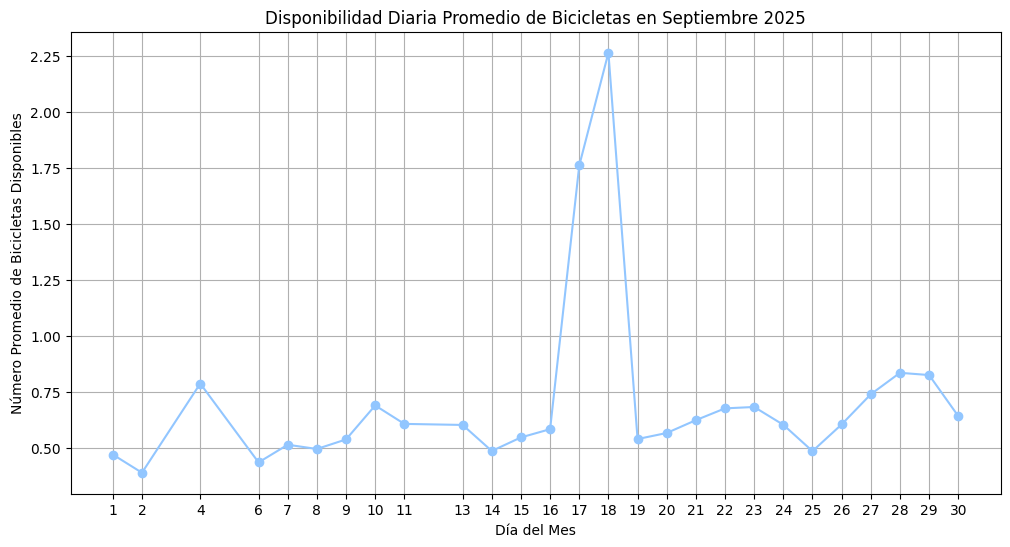

In [17]:
# Visualización de la disponibilidad diaria promedio de bicicletas
plt.figure(figsize=(12, 6))
plt.plot(df_sql_bike_availability_night_grouped['recordDay'], df_sql_bike_availability_night_grouped['nbBike'], marker='o')
plt.title('Disponibilidad Diaria Promedio de Bicicletas en Septiembre 2025')
plt.xlabel('Día del Mes')
plt.ylabel('Número Promedio de Bicicletas Disponibles')
plt.xticks(df_sql_bike_availability_night_grouped['recordDay'])
plt.grid()
plt.show()

- No coinciden los promedios, count de la columna nbBike